# how to load and manipulate fov images 

In [ ]:
#requirments
#https://pypi.org/project/aicssegmentation/
#https://pypi.org/project/aicsimageio/
#https://pypi.org/project/itkwidgets/0.12.1/

In [1]:
import os
import sys 
import datetime 

import numpy as np

current_python_path = "C:\\Users\\gil\\Documents\\projects\\aics-segmentation"
sys.path.insert(0,current_python_path)

# package for 3d visualization
from itkwidgets import view                              
from aicssegmentation.core.visual import seg_fluo_side_by_side,  single_fluorescent_view, segmentation_quick_view
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16, 12]

# package for io 
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter


In [3]:
BASE_DIR = "C:\\Users\\gil\\Documents\\projects\\aics-segmentation\\imgs"


In [4]:
 !dir $BASE_DIR

 Volume in drive C has no label.
 Volume Serial Number is 46A0-7D30

 Directory of C:\Users\gil\Documents\projects\aics-segmentation\imgs

06/05/2021  08:29    <DIR>          .
06/05/2021  08:29    <DIR>          ..
16/12/2020  08:08    <DIR>          ER2CHfromNuc
16/12/2020  08:41        44,053,642 metadata.csv
06/05/2021  08:31    <DIR>          nuclearenv
16/12/2020  11:38    <DIR>          original_fov
16/12/2020  08:36    <DIR>          predictions
16/12/2020  09:27    <DIR>          seg_gt
               1 File(s)     44,053,642 bytes
               7 Dir(s)  1,390,587,084,800 bytes free


In [5]:
fov_path = os.path.join(BASE_DIR,'original_fov','24fd2ae2_3500001155_100X_20170807_2-Scene-2-P5-E04.ome.tiff')

In [6]:
if not os.path.exists(fov_path):
    print("boo no file")

## Loading the image

In [7]:
reader = AICSImage(fov_path) 
img = reader.data

print(img.shape)


(1, 1, 7, 75, 624, 924)


In [8]:
img = np.squeeze(img, axis=0)
img = np.squeeze(img, axis=0)
#removing dummy dimensions

In [9]:
img.shape

(7, 75, 624, 924)

#### array is now (channels,z_index,x_index,y_index)

## Preview of the image

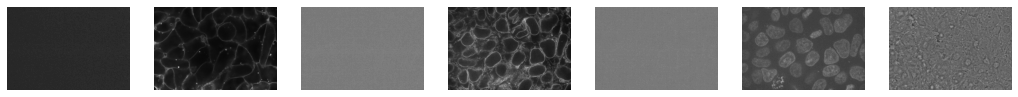

In [10]:
N_CHANNELS = img.shape[0]
MID_SLICE = np.int(0.5*img.shape[1])

fig, ax = plt.subplots(1, N_CHANNELS, figsize=(18,16), dpi=72, facecolor='w', edgecolor='k')
if N_CHANNELS>1:
    for channel in range(N_CHANNELS):
        ax[channel].axis('off')
        ax[channel].imshow(img[channel,MID_SLICE,:,:], cmap=plt.cm.gray)
else:
    ax.axis('off')
    ax.imshow(img[0,MID_SLICE,:,:], cmap=plt.cm.gray)

#only 4 channels have infomration in them (brightfield/and 3 fluorescent chaannels )

In [11]:
#####################
structure_channel = 3
#####################

struct_img0 = img[structure_channel,:,:]
view(single_fluorescent_view(struct_img0))
#switch to z-plane

Viewer(rendered_image=<itk.itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x000001…

In [12]:
#####################
brightfield_channel = 6
#####################

bright_img0 = img[brightfield_channel,:,:]
view(single_fluorescent_view(bright_img0))
#switch to z-plane

Viewer(rendered_image=<itk.itkImagePython.itkImageF3; proxy of <Swig Object of type 'itkImageF3 *' at 0x000001…